# Exercise 2: Data Preparation

---
**Written by Hendi Lie (h2.lie@qut.edu.au) and Richi Nayak (r.nayak@qut.edu.au). All rights reserved.**

Welcome to the second practical exercise for IFN645. Each exercise sheet contains a number of theoretical and programming exercises, designed to strengthen both conceptual and practical understanding of data mining processes in this unit.

To answer conceptual questions, write the answer to each question on a paper/note with your reasoning. For programming exercises, open your iPython console/Jupyter notebook and use Python commands/libraries introduced in each practical to answer the questions. In many cases, you will need to write code to support your conceptual answers.

## 0. Prequisite

Perform the following steps before trying the exercises:
1. Import pandas as "pd" and load the house price dataset into "df".
2. Print dataset information to refresh your memory.

In [1]:
import pandas as pd

df = pd.read_csv('datasets/melbourne_house_price.csv', index_col=0)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24197 entries, 0 to 24196
Data columns (total 22 columns):
Suburb                24197 non-null object
Address               24197 non-null object
Rooms                 24197 non-null int64
Type                  24197 non-null object
Price                 24197 non-null float64
Method                24197 non-null object
SellerG               24197 non-null object
Date                  24197 non-null object
Distance              24196 non-null float64
Postcode              24196 non-null float64
Bedroom2              18673 non-null float64
Bathroom              18669 non-null float64
Car                   18394 non-null float64
Landsize              15946 non-null float64
BuildingArea          9609 non-null float64
YearBuilt             10961 non-null float64
CouncilArea           24194 non-null object
Lattitude             18843 non-null float64
Longtitude            18843 non-null float64
Regionname            24194 non-null object
Pr

## 1. Exploring data

Perform following operations and answer the following questions:
1. Describe the key statistics of "Rooms" column. What is the mean and median (50% quantile) value of this column?
2. Bin the "Distance" column into 10 bins. How many houses are in each bin?
3. How many unique values are in "Method" column? What is the number of occurences for each of these unique values?
4. Assume **Price_above_median** is a binary variable of whether a house is priced above the median ($875,000) and **Type** is a categorical variable representing type of the property (house/unit/townhouse). What is the correlation between property type and price above median in this dataset? *Hint: use groupby.*

In [3]:
# 1. key statistics of rooms
df['Rooms'].describe()

count    24197.000000
mean         2.979874
std          0.960262
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: Rooms, dtype: float64

In [4]:
# 2. number of houses in each bin, derived from "Distance" column
df['Distance'].value_counts(bins=10)

(9.62, 14.43]      7857
(4.81, 9.62]       7683
(-0.0491, 4.81]    3476
(14.43, 19.24]     2817
(19.24, 24.05]     1209
(24.05, 28.86]      541
(28.86, 33.67]      271
(33.67, 38.48]      265
(43.29, 48.1]        59
(38.48, 43.29]       18
Name: Distance, dtype: int64

In [5]:
# 3. How many unique values in method and number of occurences for each of these values
df['Method'].value_counts()

S     15684
SP     3171
PI     2854
VB     2320
SA      168
Name: Method, dtype: int64

In [6]:
# 4. Correlation between property type and price above median
df.groupby(['Type'])['Price_above_median'].value_counts()

Type  Price_above_median
h     1                     10293
      0                      6010
t     0                      1373
      1                      1172
u     0                      4732
      1                       617
Name: Price_above_median, dtype: int64

## 2. Plotting

Perform the following operations using `matplotlib.pyplot` and `seaborn`. Be mindful of each column type.
1. Create a distribution plot for "Distance" column.
2. Create a distribution plot for "Type" column.
3. Create a distribution plot for "Rooms", grouped by the property type.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

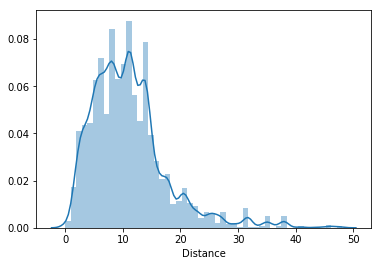

In [8]:
# distribution plot for the numerical column of "Distance"
g = sns.distplot(df['Distance'].dropna())
plt.show()

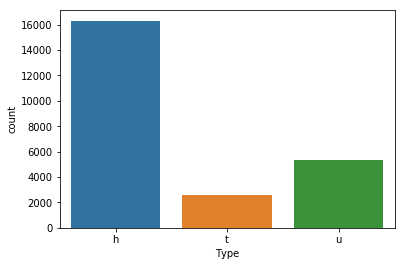

In [9]:
# distribution plot for the categorical column of "Type"
g = sns.countplot(data = df, x = 'Type')
plt.show()

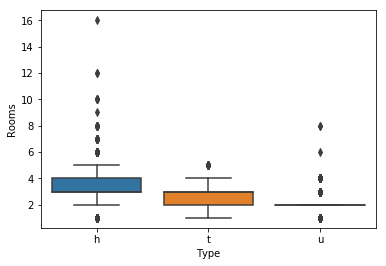

In [10]:
# distribution plot of rooms, grouped by property type
g = sns.boxplot(x='Type', y='Rooms', data=df)
plt.show()

## 3. Correcting errors in data

Perform the following operations and answer the following questions:
1. By performing data exploration, grouping and plotting, what problems have you revealed with the dataset?
2. Do you think **Address** column is useful for the predictive model? Why?
3. Impute missing values in **Car** variable. What imputation method will you use, and why?
4. Perform one hot encoding for **Type** and **Method** columns.
5. What columns do you think is not required here? Drop them.
6. What data preparation process can be performed for `Date` and `SellerG`?

### Answer

**[Question 1]** Firstly, pay attention to dataset information. There are missing values in **Bedroom2, Bathroom, Car, Landslide, BuildingArea, YearBuilt, CouncilArea, Latitude, Longitude, RegionName, PropertyCount.** Ratio of missing values in these columns are different, thus the technique of choice for fixing them will be different too.

You can choose different process to apply if you can back it up with valid reasons. For this exercise, we will apply the following techniques:
1. **Dropping rows with missing values**, applied to **Distance, Postcode, CouncilArea, Regionname and Propertycount**. These columns have relatively low number of missing values, thus removing rows with missing values is a simple approach that will not significantly impact data available for analysis.
2. **Imputation**, applied to **Bathroom** and **Car**. There are more missing values in these columns, however removing them completely will reduce amount of information significantly. We could also reasonably approximate these variables, making them suitable for imputation.
3. **Flagging** for **Lattitude** and **Longtitude**. While the rate of missing values in these two columns are similar with **Bathroom** and **Car**, approximating location of houses is much harder. Therefore, creating new columns of **Latitude_nan** and **Longtitude_nan**, denoting presence of missing values in respective column, can be a suitable approach.
4. **Drop columns**, for **Landsize, BuildingArea and YearBuilt**. All three columns have significant ratio of missing values, thus dropping them is necessary.

**[Question 2]** Address column is very specific to each house. Building a model on specific addresses can result in an overfitting model, thus we should not include it in the analysis.

**[Question 3]** **Car** is a interval variable. Both median and mean can be a valid imputations strategy.

**[Question 4]** As follows.

**[Question 5]** We have decided to drop **Address, Landsize, BuildingArea and YearBuilt**. Other columns that is not required will be **Price**, as the objective of this exercise is to simply predict whether the price is above median or not (binary classification). Predicting an interval variable like **Price** will be a regression task instead of classification.

**[Question 6]** Looking at `Date` and `SellerG`, there are a number of techniques that can be applied. For date/time variables, most models cannot utilise raw data. Thus, commonly a date is preprocessed and represented in different format, for example week/month to understand whether houses are more expensive at certain time in the year. In regards to `SellerG`, the problem is the number of levels/unique values in the variable. There are ~330 unique sellers, with some of them only selling few houses. In addition, new sellers can emerge in future data very easily, thus training models to seller names can reduces robustness of the model. There are steps that can be taken to fix this (e.g. only including top N/big sellers), but for simplicity we will simply drop this variable.


Code to perform all mentioned actions is as follow:

In [11]:
def preprocess_data(df):
    # Q1.4 and Q6.2
    df = df.drop(['Address', 'Landsize', 'BuildingArea', 'YearBuilt', 'Price', 'Bedroom2', 'SellerG'], axis=1)
    
    # Q1.1
    cols_miss_drop =['Postcode', 'CouncilArea', 'Regionname', 'Propertycount']
    mask = pd.isnull(df['Distance'])

    for col in cols_miss_drop:
        mask = mask | pd.isnull(df[col])

    df = df[~mask]
    
    # Q1.2
    df['Bathroom'].fillna(df['Bathroom'].mean(), inplace=True)
    df['Car'].fillna(df['Car'].mean(), inplace=True)
    
    df['Latitude_nan'] = pd.isnull(df['Lattitude'])
    df['Longtitude_nan'] = pd.isnull(df['Longtitude'])
    df['Lattitude'].fillna(0, inplace=True)
    df['Longtitude'].fillna(0, inplace=True)
    
    # Q6.1. Change date into weeks and months
    df['Sales_week'] = pd.to_datetime(df['Date']).dt.week
    df['Sales_month'] = pd.to_datetime(df['Date']).dt.month
    df = df.drop(['Date'], axis=1)  # drop the date, not required anymore
    
    # Q4
    df = pd.get_dummies(df)
    
    return df

In [12]:
df2 = preprocess_data(df)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24194 entries, 0 to 24196
Columns: 402 entries, Rooms to Regionname_Western Victoria
dtypes: bool(2), float64(7), int64(4), uint8(389)
memory usage: 11.2 MB


The dataset has expanded into ~400 columns, mostly consisting of one-hot variables from `Suburb`.

# Answer

When you are finished with all exercise questions, the sample answers are available in the following Github repository. Remember, please try the exercises first before viewing the answers.

https://github.com/liehendi11/IFN645_answers